In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# CIFAR10 Data set 생성

In [14]:
from tensorflow.keras.datasets import cifar10

In [15]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [16]:
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

train dataset shape: (50000, 32, 32, 3) (50000, 1)
test dataset shape: (10000, 32, 32, 3) (10000, 1)


# Data EDA

## category label number 확인

In [17]:
NAMES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
                 'horse','ship','truck'])
print(train_labels[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


## array로 첫번째 이미지 출력

## CIFAR10 데이터 시각화

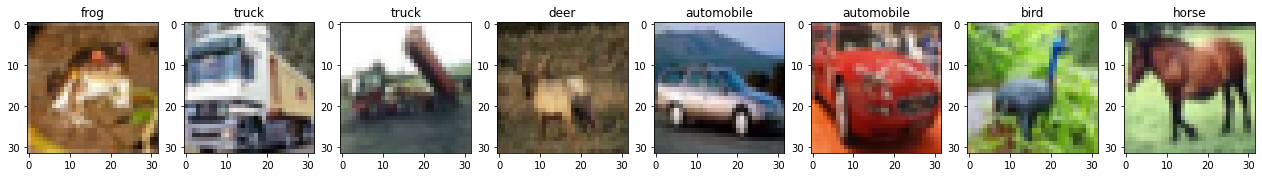

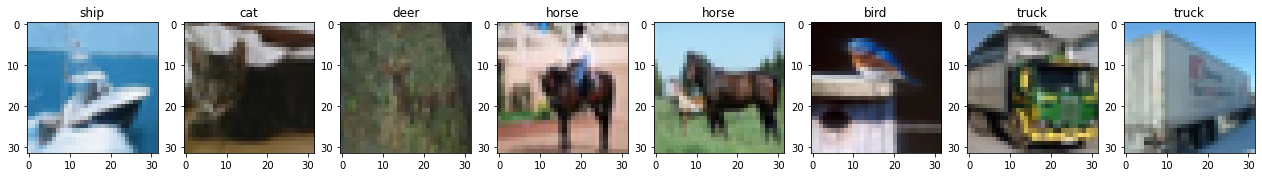

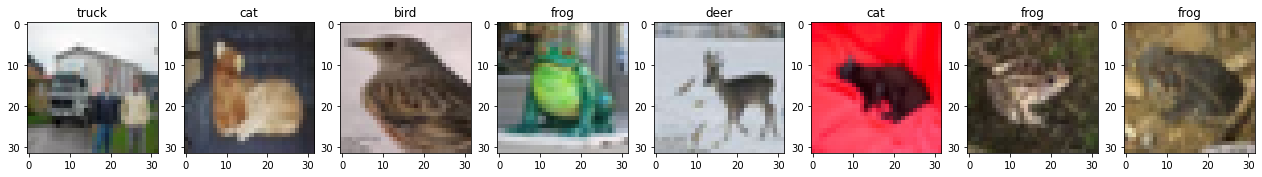

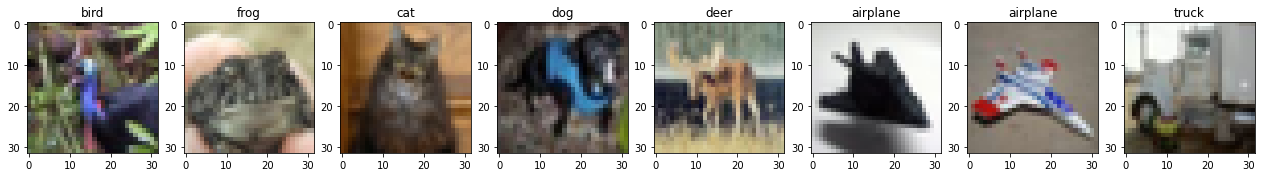

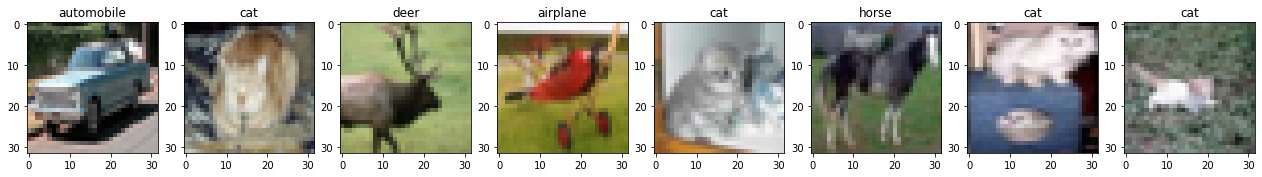

In [18]:
# CIFAR10 데이터 시각화
import matplotlib.pyplot as plt

%matplotlib inline 

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        label = labels[i].squeeze()  #2차원의 값을 1차원으로 변환해 준다. 
        axs[i].set_title(NAMES[int(label)])
        
for x in range(0, 5):
    show_images(train_images[x*8:(x+1) * 8], train_labels[x*8:(x+1) * 8], ncols=8)

## Data preprocessing

In [19]:
# Data preprocessing
def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [20]:
train_images[0, :, :, :]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [21]:
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()

## Custom Model 생성

In [22]:
IMAGE_SIZE = 32

In [23]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam, RMSprop

In [24]:
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

#x = Conv2D(filters=32, kernel_size=(5,5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=2)(x)

In [25]:
x = Flatten(name='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name='fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
activation (Activation)      (None, 16, 16, 64)        0     

In [26]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(x=train_images, y=train_labels, batch_size=64, epochs=30, validation_split=0.15 )

Epoch 1/30
665/665 [==============================] - 25s 37ms/step - loss: 1.9439 - accuracy: 0.2712 - val_loss: 4.4359 - val_accuracy: 0.1257
Epoch 2/30
665/665 [==============================] - 24s 37ms/step - loss: 1.4551 - accuracy: 0.4792 - val_loss: 5.2167 - val_accuracy: 0.1264
Epoch 3/30
665/665 [==============================] - 24s 37ms/step - loss: 1.5218 - accuracy: 0.4842 - val_loss: 5.9158 - val_accuracy: 0.1256
Epoch 4/30
665/665 [==============================] - 25s 38ms/step - loss: 1.6739 - accuracy: 0.4750 - val_loss: 8.3505 - val_accuracy: 0.1267
Epoch 5/30
665/665 [==============================] - 25s 38ms/step - loss: 1.8694 - accuracy: 0.4531 - val_loss: 7.0588 - val_accuracy: 0.1297
Epoch 6/30
665/665 [==============================] - 27s 41ms/step - loss: 1.9638 - accuracy: 0.4747 - val_loss: 11.4153 - val_accuracy: 0.1196
Epoch 7/30
665/665 [==============================] - 26s 39ms/step - loss: 3.3318 - accuracy: 0.3242 - val_loss: 2.3097 - val_accuracy